In [3]:
package RecursiveRollUp{
    import ScalarValues::*;
    import ScalarFunctions::*;
    
    package Analysis{
        import Motorcycle::*;
        
        block RecursiveAspect{
            value totalVolume : Real;
            value volume : Real = 0.0;

            part subRollUp : RecursiveAspect[0..*];
            
            constraint sum : TotalChildren(
                child = subRollUp::totalVolume, 
                total = totalVolume,
                offset = volume);
        }

        constraint def TotalChildren(child : Real[0..*], total : Real, offset : Real){
            total = sum(child) + offset;
        }
        
        individual def Analysis{
            part motorcycle : Motorcycle;
            value finalVolume : Real = motorcycle::totalVolume;
        }
    }

    package Motorcycle{
        import Analysis::*;
        
        block FrontFork :> RecursiveAspect;
        block Suspension :> RecursiveAspect;
        block Frame :> RecursiveAspect;

        block Chasis :> RecursiveAspect{
            part frame : Frame subsets subRollUp;
            part suspension : Suspension subsets subRollUp;
            part frontFork : FrontFork subsets subRollUp;
        }

        block Motorcycle :> RecursiveAspect{
            part chasis : Chasis subsets subRollUp;
        }
        
        snapshot analysis : Analysis{
            part analysisMotorcycle : Motorcycle redefines motorcycle{
                part analysisChasis : Chasis redefines chasis{
                    part analysisFrame : Frame{
                        :>> volume = 20.0;
                    }
                    part analysisSuspension : Suspension{
                        :>> volume = 30.0;
                    }
                    part analysisFrontFork : FrontFork{
                        :>> volume = 40.0;
                    }
                }
            }
        }
    }
}

Package RecursiveRollUp (ed3bac76-37f4-42df-a041-b9ee0a0d104e)


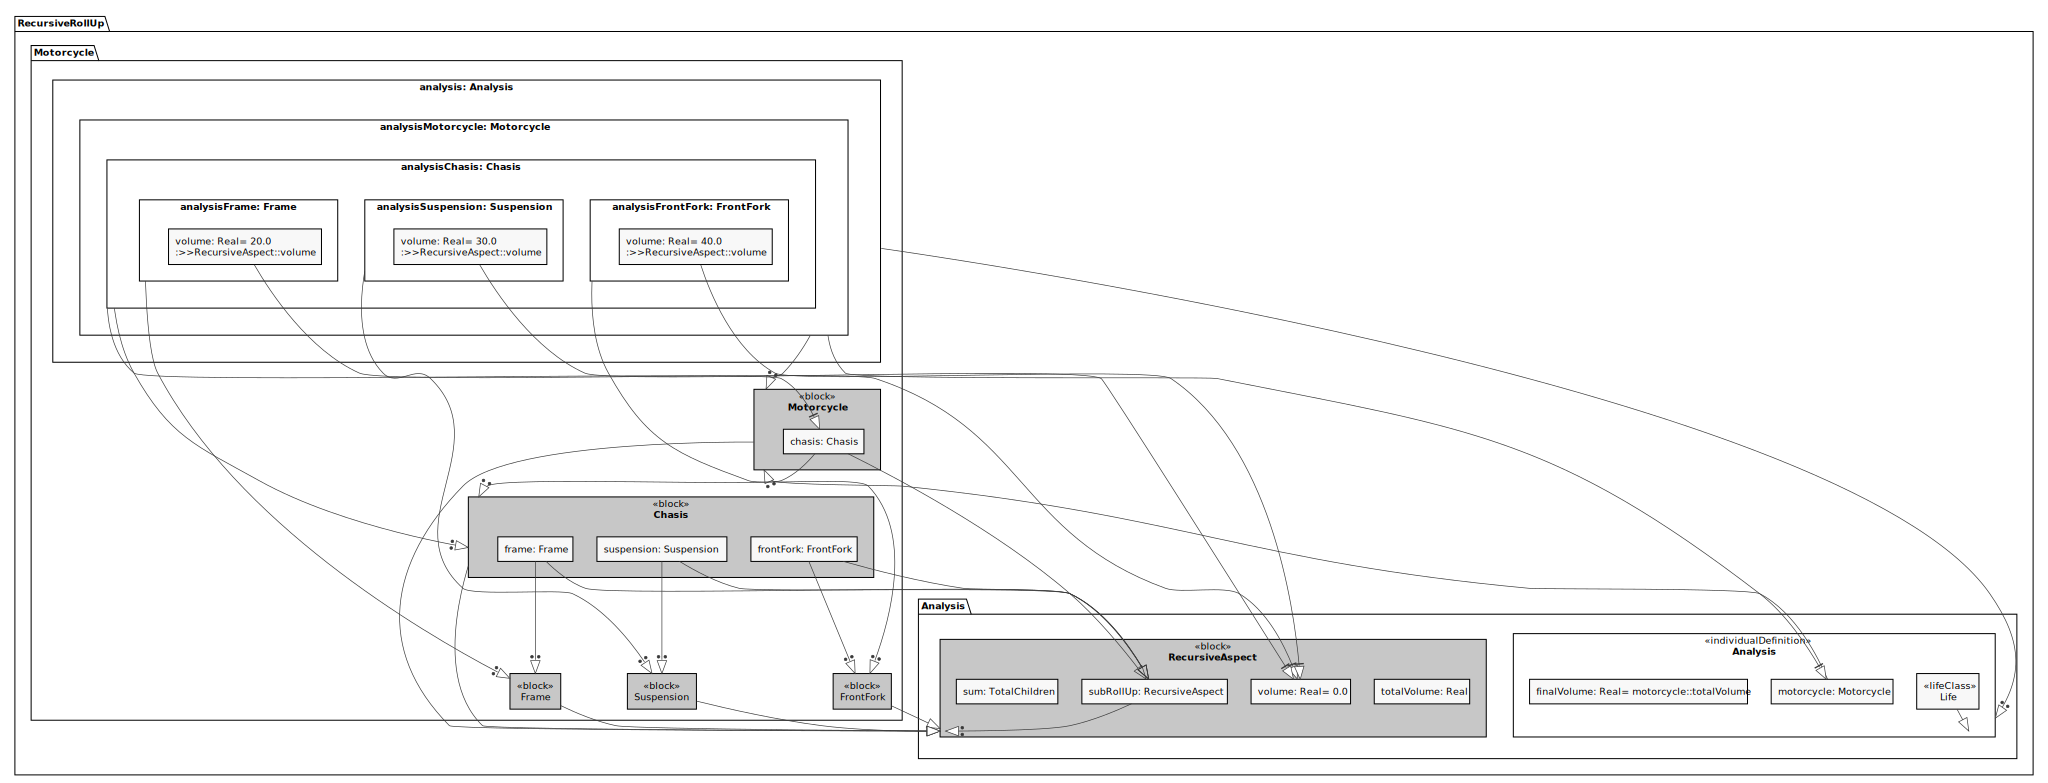

In [4]:
%viz --view=Interconnection RecursiveRollUp